<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/Fig_05_BIG_Segmentation_ann_new_fig25_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from google.colab import files

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[25]  #  numbers 4, 13 and 25 (change to the correct one: this is wrong to PSD)
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
# from segment_filter_not_conclude import Segmenta  # got image provided segmented
from segment_filter_not_conclude_parte_03 import Segmenta  

In [9]:
c =100 # size to segment
d = 250  # size to segment

In [10]:
df=Segmenta(img,c,d)
df = df.dropna()

In [11]:
print(df)

    Width           0           1  ...        9997        9998        9999
0     171  210.999969  209.968430  ...    0.076023    0.000000    0.000000
1     210  137.052155  131.002274  ...  114.795929  109.843536  110.537415
2     135  155.451294  154.740723  ...  181.548691  190.013718  192.740723
3     205  209.044632  203.951233  ...  128.067230  130.478287  132.000000
4     180  158.000000  155.419769  ...   15.691359   14.185186   12.555556
5     228  166.161591  168.461060  ...  151.286865  152.370270  151.076950
6     122  133.212845  133.656281  ...    0.000000    0.000000    0.000000
7     197  149.757538  148.522827  ...    1.969543    1.000000    1.000000
8     211   92.535156  100.282646  ...  162.828125  166.075439  166.522644
9     192  100.479164   99.311188  ...    3.447483    2.584201    4.063368
10    173  159.312134  157.690247  ...    0.400080    0.156069    1.000000
11    191  156.429321  161.418518  ...  190.997772  192.294342  194.429321
12    245  165.516876  16

In [12]:

Arq = "output_03.xlsx" # change the name in each new file
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
'''
cont = 0; num =25
img_graos = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img,c,d)
  del df['Width']
  result = np.array(df)/255
  prediction = model.predict(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)
'''

"\ncont = 0; num =25\nimg_graos = []\nimg=ww[0] \nwhile( cont < num):\n  df=Segmenta(img,c,d)\n  del df['Width']\n  result = np.array(df)/255\n  prediction = model.predict(result)\n  loc_grao =[];k=0\n  for i in prediction:\n    if( i == 0):\n      img_graos.append(df.iloc[k,:])\n      cont = cont + 1\n    k = k +1\nimg_graos = pd.DataFrame(img_graos)\nprint(img_graos)\n"

In [14]:
 num =25 #
 File_name = 'fotos_01.xlxs' # alterar para salvar os proximos

In [15]:
k = 0; cont = 0;
img_graos = []
img = ww[25] 
while( cont < num):
  df=Segmenta(img,c,d)
  print('k=',k)
  del df['Width']
  img_graos.append(df.iloc[k,:])
  cont = cont + 1
  k = k +1
img_graos = pd.DataFrame(img_graos)
# print(img_graos)
''''''

k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24


''

In [16]:
#np.sum(np.array(img_graos.iloc[[1],:]))/(28*28)

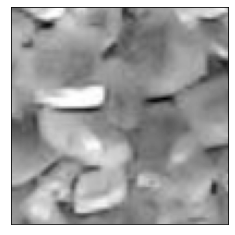

In [17]:
Size = 100
data=np.array(img_graos.iloc[[2],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(Size,Size)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

In [18]:
img_graos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,144.495270,161.565216,177.245743,189.994339,200.829865,209.143661,216.147430,221.327026,225.427216,226.678635,225.351593,225.862000,228.546310,232.550079,234.173904,236.132324,237.347824,237.948929,236.618149,234.504715,233.113419,232.739136,232.340240,232.801498,233.306244,233.608688,233.565201,232.434769,230.960297,227.795837,224.478256,222.913040,220.956512,220.396957,219.260849,217.086960,212.981079,208.992432,204.521729,201.739120,...,186.260849,188.729675,184.015106,181.584106,184.523621,186.754242,186.843079,185.826080,184.655945,183.056702,180.795837,177.782608,174.391296,170.678635,167.826080,164.480164,161.652176,159.999985,158.869553,158.495270,158.260849,165.338379,172.616241,174.241959,170.431000,167.667297,165.510391,164.391296,164.391296,164.391296,164.809082,165.130432,163.585999,161.185242,159.173904,158.043472,156.975418,156.521744,155.686188,155.164459
1,164.974365,167.897446,170.384613,170.960571,171.000000,173.373444,176.775818,176.347153,173.843536,168.499680,162.397781,157.310333,154.871811,155.305725,157.524002,161.374115,166.203827,168.000000,167.199219,164.461548,158.550964,152.717957,150.339905,152.902710,158.111786,162.769241,160.074966,157.647614,156.480621,156.413544,158.381348,161.652863,165.128204,167.151886,167.169647,166.480621,170.159119,174.231445,177.390533,181.051300,...,193.263000,192.025665,191.949402,193.557541,197.435913,202.842896,206.476685,201.015808,199.190674,203.222229,204.712708,192.301132,183.110458,179.410263,173.726501,158.984894,152.687714,150.485199,155.272186,167.987534,176.448395,178.986206,177.641037,175.258392,171.103897,163.541748,156.589767,157.248535,169.550323,188.023682,207.785690,223.439850,231.464844,234.920471,234.723221,229.689697,221.473389,214.058533,212.276154,216.512833
2,139.298737,137.315063,138.514526,143.133041,154.985657,180.041977,200.352493,208.304398,209.519440,211.972427,214.797455,216.315430,219.241226,218.156113,211.134491,202.907532,204.697861,215.118912,226.798538,238.781326,248.751648,252.744125,251.925262,250.964798,221.610229,191.822342,185.840195,195.204971,196.642212,206.539780,224.930740,239.367966,244.085587,241.698196,219.766953,197.377182,188.249359,190.449844,195.097610,195.118225,...,159.714767,160.392029,159.680237,160.526550,158.398895,160.032761,170.114471,186.353012,197.505432,200.768127,202.391846,201.723969,195.578796,185.684113,180.003357,176.281738,170.839050,167.747314,168.321762,170.159286,169.202316,169.724426,167.236145,165.263107,168.164673,176.517090,185.681000,189.862335,189.649307,187.621460,183.785156,178.296158,176.935608,174.510590,170.683105,165.350555,160.988052,158.670822,159.215912,161.465607
3,102.779297,100.558586,98.675552,98.657715,97.702591,96.779114,94.670380,93.040268,91.436249,89.449661,86.489166,82.885902,79.073830,75.313553,73.955681,74.657722,74.806366,75.328857,75.468491,76.000000,76.996399,78.194633,79.132660,80.510071,81.167801,82.000000,82.876274,83.169952,82.046982,81.315308,81.933792,82.456375,83.114105,84.145676,84.328865,84.328865,84.020905,83.328857,83.328857,83.058601,...,123.058609,126.250900,130.217377,132.483231,133.328857,134.456375,137.000000,141.274857,142.492371,143.982315,147.604034,148.951630,147.304184,139.382645,127.997787,114.484711,101.610786,90.908386,82.957703,76.963120,73.897255,71.868164,70.717674,68.327866,65.590607,65.057747,65.633804,66.206573,65.396378,64.009056,63.391968,60.625427,54.560467,46.162380,32.142113,14.774157,1.355705,2.671141,1.657718,0.328859
4,101.941177,96.882355,92.651382,89.026817,88.961945,89.725777,92.395340,94.269897,95.153122,94.558823,94.000000,93.743080,93.367645,93.000000,93.294128,94.410896,95.041519,96.352936,97.617645,99.029404,100

In [19]:
np.sum(np.array(img_graos.iloc[[3],:]))/(28*28)

1380.888494688777

In [20]:
img_graos.iloc[[3],:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
3,102.779297,100.558586,98.675552,98.657715,97.702591,96.779114,94.67038,93.040268,91.436249,89.449661,86.489166,82.885902,79.07383,75.313553,73.955681,74.657722,74.806366,75.328857,75.468491,76.0,76.996399,78.194633,79.13266,80.510071,81.167801,82.0,82.876274,83.169952,82.046982,81.315308,81.933792,82.456375,83.114105,84.145676,84.328865,84.328865,84.020905,83.328857,83.328857,83.058601,...,123.058609,126.2509,130.217377,132.483231,133.328857,134.456375,137.0,141.274857,142.492371,143.982315,147.604034,148.95163,147.304184,139.382645,127.997787,114.484711,101.610786,90.908386,82.957703,76.96312,73.897255,71.868164,70.717674,68.327866,65.590607,65.057747,65.633804,66.206573,65.396378,64.009056,63.391968,60.625427,54.560467,46.16238,32.142113,14.774157,1.355705,2.671141,1.657718,0.328859


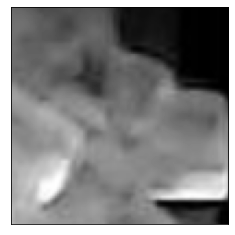

In [21]:
data=np.array(img_graos.iloc[[3],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(Size,Size)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

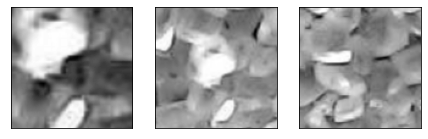

In [22]:
Num = 3
Size=100
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(img_graos.iloc[i,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(Size,Size)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)

In [23]:
print(np.random.rand(1,3))

[[0.91601011 0.14448527 0.40818996]]
